#Stock Price Prediction using Machine Learning
Using the LSTM (Long Short Term Memory) artificial neural network on AAPL's past stock data to predict the stock price

### LSTM is used for sequence prediction problems and it is extremely effective as it stores past info that is important and forgets the info that is not.

In [109]:
#Importing The Neccesary Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [110]:
# !pip install --upgrade pandas-datareader

# !pip install --upgrade pandas
#Restart runtime if it errors out!

In [111]:
#Get The Stock Data
data_source = 'yahoo'
start_date = '2017-01-01'
end_date = '2022-11-30'
df = web.DataReader('AAPL', data_source, start_date, end_date)

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219835
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189367
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.327635
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.632292
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.885391
...,...,...,...,...,...,...
2022-08-04,167.190002,164.429993,166.009995,165.809998,55474100.0,165.580002
2022-08-05,165.850006,163.000000,163.210007,165.350006,56646600.0,165.350006
2022-08-08,167.809998,164.199997,166.369995,164.869995,60276900.0,164.869995


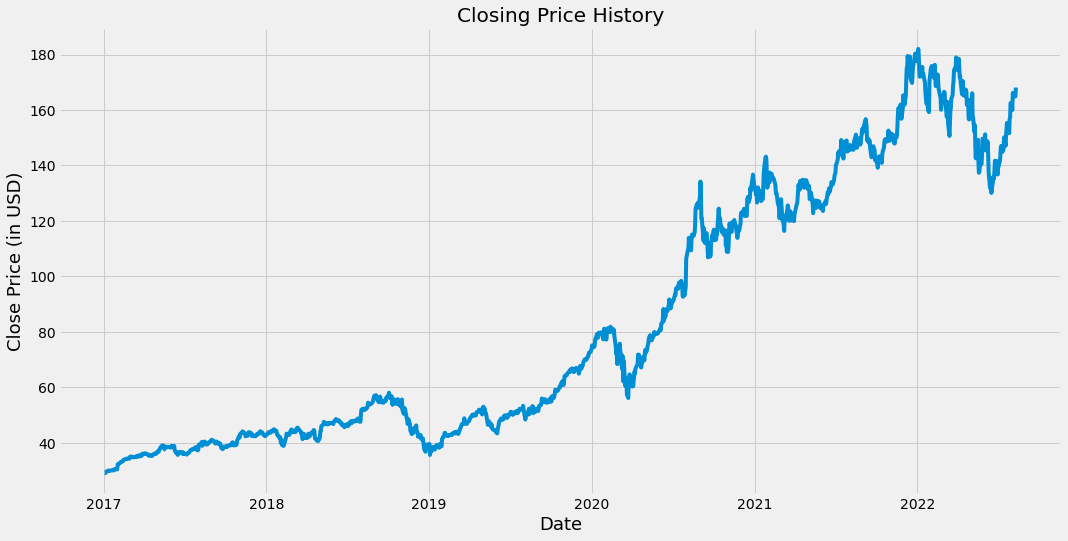

In [112]:
#Closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (in USD)',fontsize=18)
plt.show()

##We can now visualize the closing price of the stock and a general upward trend is seen, which usually means a strong buy.

#DISCLAIMER: This is not financial advise.

In [113]:
#Create a new datafram with only the 'Close' column
close_data = df.filter(['Close'])
#Convert the dataframe into a numpy array
dataset = close_data.values
#Get the number of rows to trainthe model on (say 80% of the available data)
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1129

In [114]:
#Scaling the data (Preprocessing)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.12419344e-04],
       [0.00000000e+00],
       [9.64027295e-04],
       ...,
       [8.87977518e-01],
       [8.88304324e-01],
       [9.08989979e-01]])

In [115]:
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00021242, 0.        , 0.00096403, 0.00308815, 0.00485278,
       0.00504886, 0.00609458, 0.00527761, 0.00493449, 0.00650306,
       0.00648672, 0.00614359, 0.00650306, 0.00663378, 0.00645405,
       0.00957485, 0.0096729 , 0.00968923, 0.00916637, 0.00870887,
       0.02079998, 0.02044051, 0.02133918, 0.02331623, 0.02534231,
       0.02617561, 0.02679651, 0.02630633, 0.02821803, 0.03104475,
       0.03184536, 0.03158395, 0.0321885 , 0.03378975, 0.03445967,
       0.03351198, 0.0337244 , 0.03416554, 0.0342636 , 0.0388386 ,
       0.03748245, 0.03882227, 0.03810333, 0.03839745, 0.0375478 ,
       0.03702493, 0.03777655, 0.03787458, 0.03753147, 0.03993335,
       0.04030915, 0.0391654 , 0.04156729, 0.0389203 , 0.04150192,
       0.04068495, 0.04022745, 0.0406196 , 0.04539069, 0.04591353])]
[0.0456030797713296]

[array([0.00021242, 0.        , 0.00096403, 0.00308815, 0.00485278,
       0.00504886, 0.00609458, 0.00527761, 0.00493449, 0.00650306,
       0.00648672, 0.00614359, 0.006

In [116]:
#Convert the x_train and y_train data sets to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [117]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1069, 60, 1)

In [118]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [119]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [120]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1069/1069 [==============================] - 34s 29ms/step - loss: 0.0012


In [121]:
#Create the testing dataset
test_data = scaled_data[training_data_len - 60: , :]
#Creatin x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [122]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [123]:
#Reshape the data(LSTM expects 2 dimensional data so we gotta reshape the 3 dimensional data)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [124]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [125]:
#Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.7961624361944537

In [126]:
#Plot the data
train = close_data[:training_data_len]
valid = close_data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


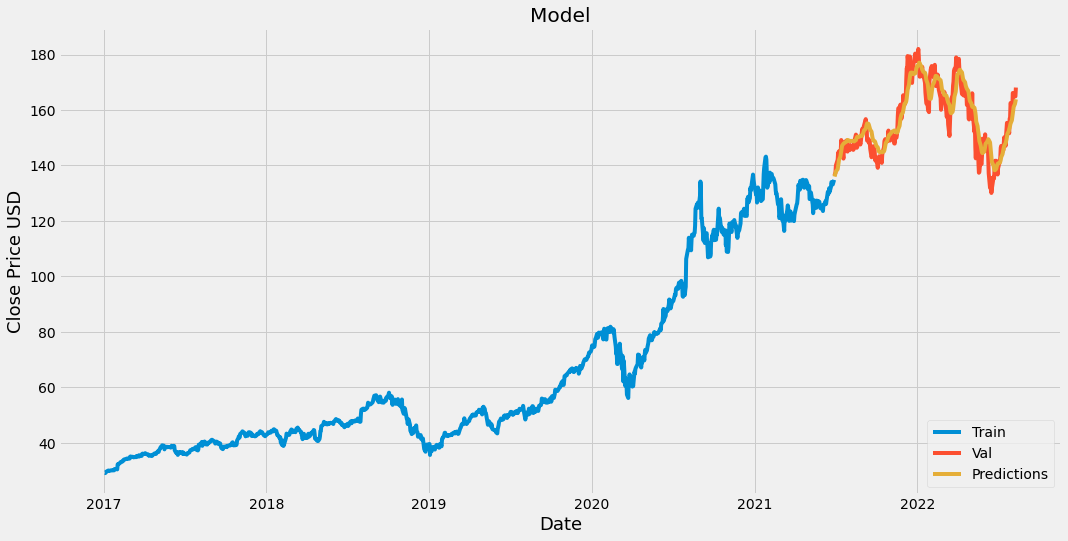

In [127]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

#Yoooo!! The model  is decently accurate!
(at the time of writing this, the rmse was 0.7961624361944537 )

This is subject to change if you rerun the code.

In [128]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-06-29,136.330002,135.967285
2021-06-30,136.960007,136.547714
2021-07-01,137.270004,137.183701
2021-07-02,139.960007,137.819580
2021-07-06,142.020004,138.630478
...,...,...
2022-08-04,165.809998,159.768356
2022-08-05,165.350006,161.068680
2022-08-08,164.869995,162.213516
